In [26]:
import warnings
warnings.filterwarnings("ignore")

#import libraries
import pandas as pd
import numpy as np

#import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
from pydataset import data

#sklearn imports
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import model

### Select a dataset with a continuous target variable.

#### Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

#### Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [30]:
df = data('mpg')

In [31]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [34]:
df = df[['displ', 'cyl', 'cty', 'hwy']]

In [35]:
df.head()

,displ,cyl,cty,hwy
1,1.8,4,18,29
2,1.8,4,21,29
3,2.0,4,20,31
4,2.0,4,21,30
5,2.8,6,16,26


In [36]:
df['comb_mpg'] = (df.cty + df.hwy) / 2

In [37]:
df.head()

,displ,cyl,cty,hwy,comb_mpg
1,1.8,4,18,29,23.5
2,1.8,4,21,29,25.0
3,2.0,4,20,31,25.5
4,2.0,4,21,30,25.5
5,2.8,6,16,26,21.0


In [38]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.X_y_split(df, 'comb_mpg')

X_train -> (130, 4)
X_validate -> (57, 4)
X_test -> (47, 4)


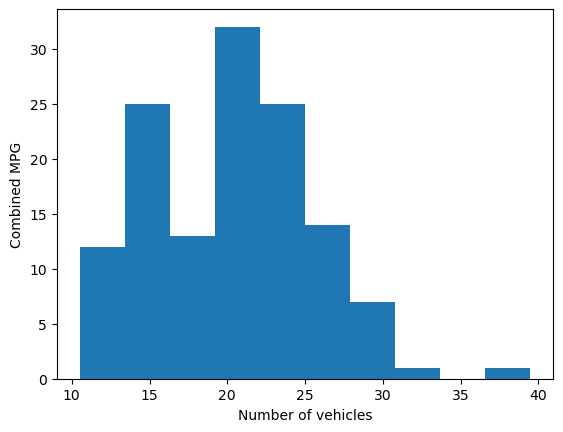

In [39]:
plt.hist(y_train)
plt.xlabel("Number of vehicles")
plt.ylabel("Combined MPG")
plt.show()


In [40]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict G3_pred_mean
mpg_pred_mean = y_train['comb_mpg'].mean()
y_train['mpg_pred_mean'] = mpg_pred_mean
y_validate['mpg_pred_mean'] = mpg_pred_mean

# 2. compute G3_pred_median
mpg_pred_median = y_train['comb_mpg'].median()
y_train['mpg_pred_median'] = mpg_pred_median
y_validate['mpg_pred_median'] = mpg_pred_median

# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.comb_mpg, y_train.mpg_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.comb_mpg, y_validate.mpg_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.comb_mpg, y_train.mpg_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.comb_mpg, y_validate.mpg_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


RMSE using Mean
Train/In-Sample:  5.15 
Validate/Out-of-Sample:  5.44
RMSE using Median
Train/In-Sample:  5.2 
Validate/Out-of-Sample:  5.41


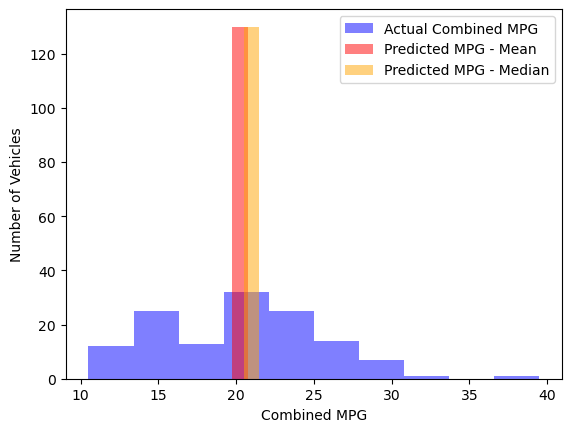

In [28]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.comb_mpg, color='blue', alpha=.5, label="Actual Combined MPG")
plt.hist(y_train.mpg_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted MPG - Mean")
plt.hist(y_train.mpg_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted MPG - Median")
plt.xlabel("Combined MPG")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()


In [41]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.comb_mpg)

# predict train
y_train['mpg_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.comb_mpg, y_train.mpg_pred_lm)**(1/2)

# predict validate
y_validate['mpg_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.comb_mpg, y_validate.mpg_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  2.4534904774458083e-15 
Validation/Out-of-Sample:  2.3410483424174417e-15


In [42]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.comb_mpg)

# predict train
y_train['mpg_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.comb_mpg, y_train.mpg_pred_lars)**(1/2)

# predict validate
y_validate['mpg_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.comb_mpg, y_validate.mpg_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  5.150883189622543 
Validation/Out-of-Sample:  5.437509818669983


In [43]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.comb_mpg)

# predict train
y_train['mpg_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.comb_mpg, y_train.mpg_pred_glm)**(1/2)

# predict validate
y_validate['mpg_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.comb_mpg, y_validate.mpg_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.7543401188995522 
Validation/Out-of-Sample:  0.9671864312143953


In [44]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [45]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.comb_mpg)

# predict train
y_train['mpg_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.comb_mpg, y_train.mpg_pred_lm2)**(1/2)

# predict validate
y_validate['mpg_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.comb_mpg, y_validate.mpg_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  6.699262447931576e-15 
Validation/Out-of-Sample:  6.264925374734827e-15


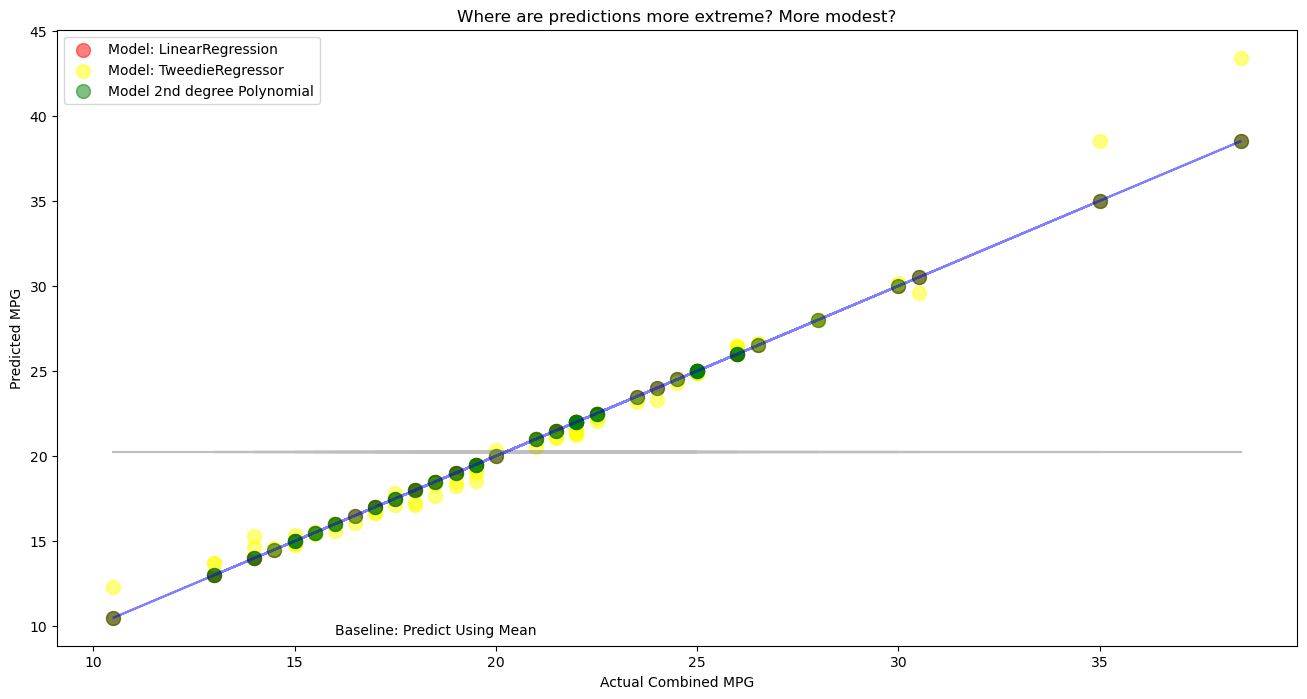

In [46]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.comb_mpg, y_validate.mpg_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.comb_mpg, y_validate.comb_mpg, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.comb_mpg, y_validate.mpg_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.comb_mpg, y_validate.mpg_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.comb_mpg, y_validate.mpg_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Combined MPG")
plt.ylabel("Predicted MPG")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


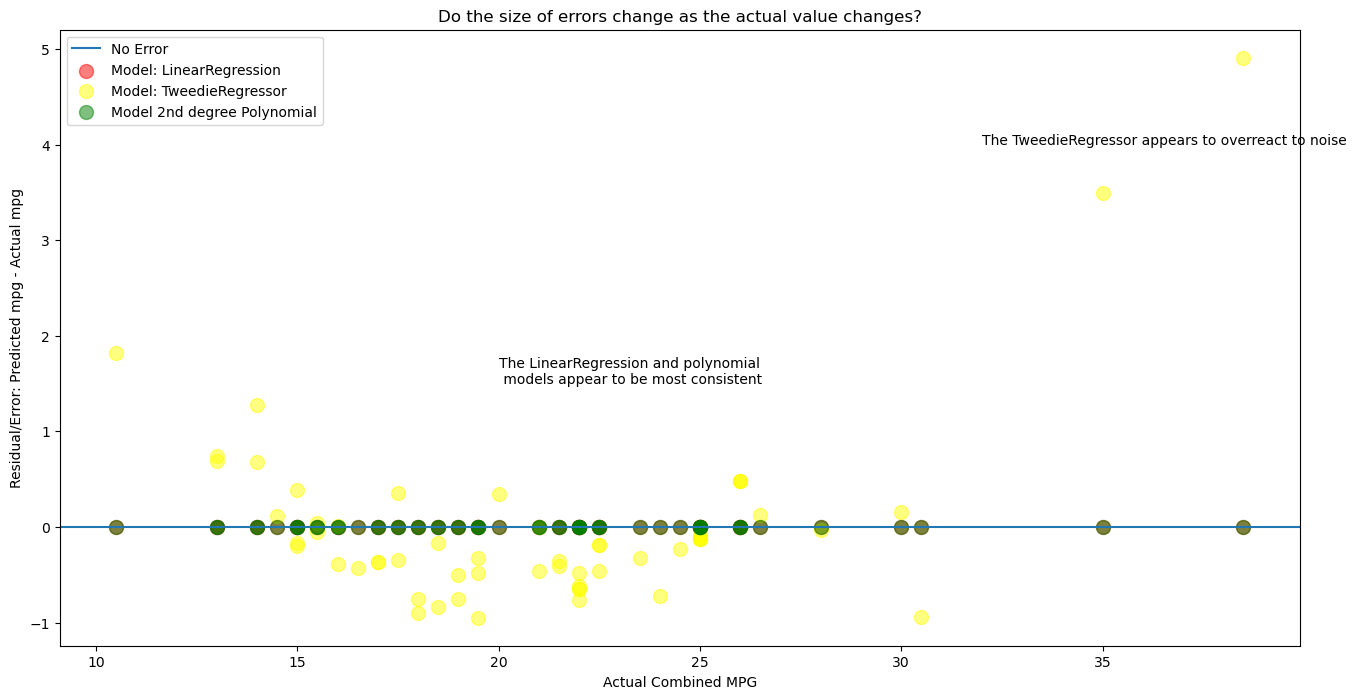

In [51]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.comb_mpg, y_validate.mpg_pred_lm - y_validate.comb_mpg, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.comb_mpg, y_validate.mpg_pred_glm - y_validate.comb_mpg, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.comb_mpg, y_validate.mpg_pred_lm2 - y_validate.comb_mpg, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Combined MPG")
plt.ylabel("Residual/Error: Predicted mpg - Actual mpg")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The TweedieRegressor appears to overreact to noise", (32, 4))
plt.annotate("The LinearRegression and polynomial\n models appear to be most consistent", (20, 1.5))
plt.show()


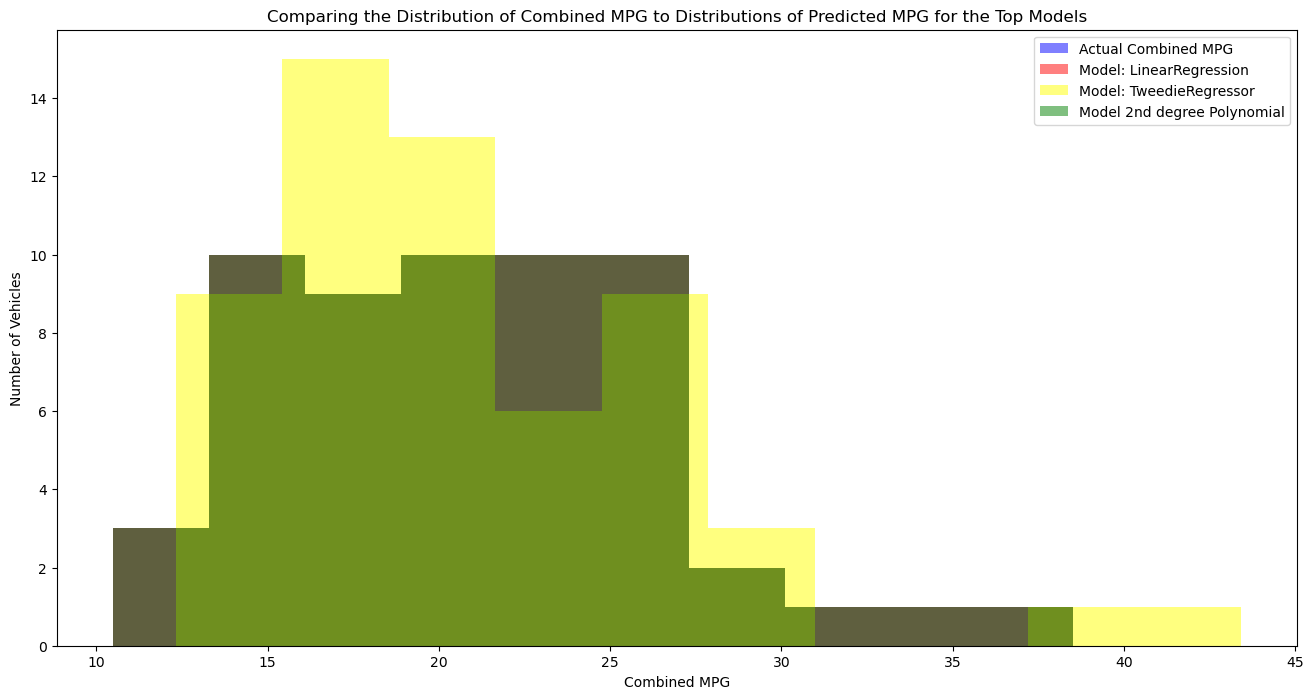

In [53]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.comb_mpg, color='blue', alpha=.5, label="Actual Combined MPG")
plt.hist(y_validate.mpg_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.mpg_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.mpg_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Combined MPG")
plt.ylabel("Number of Vehicles")
plt.title("Comparing the Distribution of Combined MPG to Distributions of Predicted MPG for the Top Models")
plt.legend()
plt.show()


In [55]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['mpg_pred_lm2'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.comb_mpg, y_test.mpg_pred_lm2)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)


RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  2.642396303534902e-15
